In [2]:
## Análise de diferenças entre os dados - ANOVA, boxplot, t-confidence interval

## CÉLULA 1: Instruções de carregamento do arquivo e bibliotecas a ser importadas

""""
    Para executar uma CÉLULA, pressione o botão "Run" no topo, com a CÉLULA selecionada, ou pressione:
    
    Shift + Enter

-Se seus dados estiverem em um arquivo xlsx utilize a CÉLULA 2

-Se seus dados estiverem em um arquivo csv contendo cabeçalhos, utilize a CÉLULA 3

-Se seus dados estiverem em um arquivo csv sem cabeçalhos, utilize a CÉLULA 4

-Utilize apenas a CÉLULA correta
-Substitua o texto entre aspas na variável "caminho" pelo endereço do arquivo em sua máquina.

EXECUTE ESTA CÉLULA ANTES DE PROSSEGUIR

EXECUTE APENAS UMA CÉLULA POR VEZ

-Caso deseje apagar a saída de uma célula carregada, mas não deseje carregar uma nova saída, vá à aba superior, escolha o ícone
do teclado (open the command palette/ jupyter-notebook command group) e selecione clear cell output.

@author: Marco César Prado Soares, MSc.
Especialista Lean Six Sigma Master Black Belt, Eng. Químico, MSc. Eng. Mecatrônica (instrumentação) 
Marco.Soares@br.ey.com; marcosoares.feq@gmail.com
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## CÉLULA 3: dados em arquivo csv com cabeçalho

caminho = "weekly_app.csv"
dataset = pd.read_csv(caminho)

dataset
#SIGA PARA A CÉLULA 5

,date,count,time_tag,waiting_time,pq_satisfacao
0,2020-02-24,25.0,0.000000,14.160000,4.840000
1,2020-03-02,41.0,0.000000,11.024390,4.195122
2,2020-03-09,31.0,0.000000,11.387097,4.870968
3,2020-03-16,3.0,0.000000,10.666667,3.666667
4,2020-03-23,29.0,0.000000,10.241379,5.172414
5,2020-03-30,44.0,0.000000,11.795455,3.159091
6,2020-04-06,44.0,0.000000,10.659091,4.500000
7,2020-04-13,51.0,0.000000,14.176471,3.843137
8,2020-04-20,59.0,0.000000,12.000000,3.677966
9,2020-04-27,99.0,0.000000,19.878788,3.707071


Na semana 2020-07-27 (linha 22), ocorre a mudança, resultando em um time\_tag fracionário. Vamos mudar manualmente este valor para 1

In [4]:
dataset.iloc[22,2] = 1
print(dataset)

          date  count  time_tag  waiting_time  pq_satisfacao
0   2020-02-24   25.0       0.0     14.160000       4.840000
1   2020-03-02   41.0       0.0     11.024390       4.195122
2   2020-03-09   31.0       0.0     11.387097       4.870968
3   2020-03-16    3.0       0.0     10.666667       3.666667
4   2020-03-23   29.0       0.0     10.241379       5.172414
5   2020-03-30   44.0       0.0     11.795455       3.159091
6   2020-04-06   44.0       0.0     10.659091       4.500000
7   2020-04-13   51.0       0.0     14.176471       3.843137
8   2020-04-20   59.0       0.0     12.000000       3.677966
9   2020-04-27   99.0       0.0     19.878788       3.707071
10  2020-05-04  146.0       0.0     11.130137       4.205479
11  2020-05-11  187.0       0.0     23.208556       4.096257
12  2020-05-18  192.0       0.0     27.541667       3.937500
13  2020-05-25  199.0       0.0     23.768844       3.879397
14  2020-06-01  212.0       0.0     46.976415       4.278302
15  2020-06-08  223.0   

Reexportar o dataframe corrigido

In [11]:
dataset.to_csv(r"weekly_app_v2.csv", index = False)

# CÉLULA 6: Instruções Gerais

### ATENÇÃO: NÃO EXECUTE ESTA CÉLULA - Ela contém apenas texto explicativo

Este notebook destina-se à análise de diferenças de médias entre conjuntos de dados, construção dos diagramas boxplot e cálculo dos intervalos de confiança das médias (t-confidence intervals). Utilize a função correspondente à sua situação.

## 1) Dados a serem comparados estão todos na mesma coluna

- Neste caso, os dados estão todos na mesma coluna, e uma segunda coluna identifica os diferentes tratamentos. Ou seja: colunas diferentes NÃO correspondem a tratamentos diferentes.
- A função permite avaliar até 6 fatores/tratamentos simultâneos, sem necessidade de expansão do código, e possibilita a construção do boxplot e dos intervalos de confiança das médias.

Siga para as CÉLULAS 7 a 9.
----------------------------------------

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

## 2) Dados a serem comparados estão separados em colunas distintas

- Neste caso, os dados estão cada um em uma coluna diferente. Ou seja: colunas diferentes CORRESPONDEM a tratamentos diferentes, e cada coluna corresponde a um único tratamento/fator.
- A função permite avaliar até 6 fatores/tratamentos simultâneos, sem necessidade de expansão do código, e possibilita a construção do boxplot e dos intervalos de confiança das médias.

Siga para as CÉLULAS 10 a 12.
----------------------------------------

In [5]:
## CÉLULA 7: Função para análise de variância (ANOVA) - Verificar se as médias dos resultados correspondentes a diferentes
# tratamentos são ou não diferentes. 
# Neste caso, a função analisa a situação na qual os dados estão todos na mesma coluna, ou seja, uma segunda coluna é utilizada
# para identificar os diferentes tratamentos (por meio de tags/marcadores)
# Colunas diferentes NÃO correspondem a tratamentos diferentes.

#Execute esta CÉLULA para carregar a função

def anova_boxplot_same_column(dataframe, col_y_name, col_factor_name, confidence = 0.95, factor_labels = None, reference_line = None,  plot_boxplot = True, calculate_confidence_interval = True):

        import pandas as pd
        import matplotlib.pyplot as plt
        import numpy as np
        from scipy import stats
        
        name1 = col_y_name
        name2 = col_factor_name
        
        #organizar o dataframe, de modo que os grupos fiquem juntos, e possa ser
        #identificado o numero de fatores (grupos):
        
        # Exemplo de como seria se fosse conhecido o nome da coluna:
        # teste = dataset.sort_values(by=['Lote A'])
        
        dataframe = dataframe.sort_values(by = [name2])
        #os fatores agora estao agrupados
        dataframe = dataframe.reset_index(drop=True)
        #garante que os indices estejam em ordem
        
        y = dataframe[name1]
        #valores y em torno dos quais sera feito o ANOVA
        factors = dataframe[name2]
        n_measurements = len(dataframe)
        #total de dados
        
        grupo = factors[0] #primeira posicao
            
        #vamos encontrar os indices nos quais ocorrem as mudancas de fator
        #e quebrar em varios arrays de acordo com os fatores
            
        indices_of_factors = []
        #lista dos indices de troca de array
        #sao os indices em que ocorre mudanca de fator
            
        i = 1
        while (i < n_measurements):
                
            if (i > (n_measurements-1)):
                        
                #Esta restricao extra impede que se acesse um indice
                #i inexistente
                break
            
            if (grupo != factors[i]):
                    
                indices_of_factors.append(i)
                #grava o indice da mudanca de fator
                #este indice indicara onde quebrar em arrays
                grupo = factors[i]
                    
            i = i + 1    
            
            #total de splits/fatores
            #se a lista indices_of_factors possui apenas um elemento, significa
            #que temos 2 splits (2 fatores diferentes)
            #se existem 2 elementos, temos 3 fatores diferentes
            #logo, o numero de fatores = total de elementos da lista 
            #indices_of_factors + 1
            
        n_factors = len(indices_of_factors) + 1
        #variavel que armazena o total de fatores/splits das listas originais
            
        #CHECAR CONDICOES: O GRAFICO NAO PODE SER GERADO SE n_tags = 1 ou
        #n_tags >=4. Nestas condicoes, a mensagem de erro seria gerada
        #pois o grafico usa variaveis locais criadas para cada condicao
            
        #CHECAR CONDICOES: O GRAFICO NAO PODE SER GERADO SE
        #n_tags >=7. Nestas condicoes, a mensagem de erro seria gerada
        #pois o grafico usa variaveis locais criadas para cada condicao
        
        if (n_factors > 6):
            print("\n") #\n = quebra de linha
            print("Error! Too much factors!\n")
            print("Copy and paste the code to create more factors, or reduce the number of tested factors.\n")
        
        else:
            
            if not (factor_labels is None):
                
                if (len(factor_labels) != n_factors):
                    print("\n") #\n = quebra de linha
                    print("Error! The total of elements on factors_labels list is different from the number of factors.\n")
                    print("Correct it, or keep factors_labels = None\n")
                
                    
            if(n_factors == 1):
                print("\n") #\n = quebra de linha
                print("Warning! Only one factor! The analysis of variance demands at least two factors/groups to be compared. Only the mean confidence interval was calculated.\n")
                
                if (calculate_confidence_interval == True):
                    #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                    n = n_measurements
                    degree_freedom = n-1
                    xbar = y.mean()
                    s = y.std()
                    #valor medio
                    nivel = confidence #nao perder o valor
                    nivel = nivel*100 #registrar em porcentagem
                    confidence = 1 - confidence
                    #alfa da t student bicaudal
                    confidence = confidence/2
                    #alfa/2
                    t = stats.t.ppf((1-confidence), degree_freedom)
                            
                    #intervalo de confianca da media:
                    lim_inf = xbar - t*s/(np.sqrt(n))
                    lim_sup = xbar + t*s/(np.sqrt(n))
                    
                    if not (factor_labels is None):
                        y_lab = factor_labels[0]
                            
                    else:
                        y_lab = factors[0]
                    
                    estatisticas = []
                    y_res = []
                                
                    string1 = "Nível de confiança (em porcentagem) = %.2f" %(nivel)
                    estatisticas.append(string1)
                    y_res.append(None)
                    string2 = "Limite inferior do intervalo de confiança da média"
                    estatisticas.append(string2)
                    y_res.append(lim_inf)
                    texto_extra = "Média amostral: centro do intervalo de confiança"
                    estatisticas.append(texto_extra)
                    y_res.append(xbar)
                    string3 = 'Limite superior do intervalo de confiança da média'
                    estatisticas.append(string3)
                    y_res.append(lim_sup)
                    
                    if not (reference_line is None):
                        string4 = "Valor de referência: %.2f" %(reference_line)
                        estatisticas.append(string4)
                        if (lim_inf < reference_line) and (reference_line < lim_sup):
                            y_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                        else:
                            y_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                    
                    d = {'Valor': estatisticas,
                         y_lab: y_res}
                            
                    confidence_interval = pd.DataFrame(data = d)
                    
                if (plot_boxplot == True):
                            
                    #construir box plot
                    fig, ax = plt.subplots()
                    
                    # rectangular box plot
                    ax.boxplot([y], labels = [y_lab])
                    
                    ax.set_title('Box plot')
                    ax.set(ylabel='Variables')
                    
                    if not (reference_line is None):
                        ax.axhline(reference_line, color = 'red', linestyle = 'dashed', label = 'Reference')
                    
                    #Criar linha horizontal tenue, que apenas guie os olhos se distrair
                    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
                    ax.grid(True) #mude para False, caso não deseje ver as linhas de grade      
                    ax.legend()
                    plt.show()
                    
                if (calculate_confidence_interval == True):
                    
                    return confidence_interval
            
            if (2 <= n_factors <= 6): 
                    
                    if not (factor_labels is None):
                
                        if (len(factor_labels) != n_factors):
                            print("\n") #\n = quebra de linha
                            print("Error! The total of elements on factors_labels list is different from the number of factors\n")
                            print("Correct it, or keep factors_labels = None\n")
                    
                        """
                        Vamos primeiro quebrar os valores de acordo com os fatores
                        Para isso, usamos a função numpy.array_split(ary, indices_or_sections) 
                        que quebra a lista ou array 'ary' nas posições indicadas na lista 
                        'indices_or_sections'. A função numpy.split não pode ser usada, pois ela 
                        apenas permite quebra se a lista 'ary' for dividida em sublistas de mesmo
                        tamanho.
                        
                        Ao fim, reconcatemos as listas usando a função 
                        numpy.concatenate((y1, y2, ...), axis=None) que junta as listas em um novo
                        array.
                        
                        Esta função, porém, também tem uma limitação: ela não permite concatenar datas
                        ou horas, que podem constituir o eixo X de uma série temporal.
                        (Esta limitação não existe quando se trata de variáveis float ou strings)
                        
                        Porém, na etapa final, nao precisamos nos preocupar. Como a variavel x
                        não é manipulada, basta tomar o x original (ela porém é separada
                        para indicar os valores corretos na avaliação de se o ponto esta
                        dentro dos limites). O mesmo é feito com as tags, evitando que a
                        presença de hora/data comprometa o código.
                        
                        O X apenas é dividido para permitir a aferição do ponto que passa
                        dos limites de controle ou especificação. Como não há informação
                        obtida pela divisão das tags, elas não são divididas.
                        
                        """
                        
                    if (n_factors == 2):
                        #temos dois subgrupos
                           
                            y1, y2 = np.split(ary = y, indices_or_sections = indices_of_factors, axis=0)
                            y1 = y1.reset_index(drop=True)
                            y2 = y2.reset_index(drop=True)
                            n1 = len(y1)
                            n2 = len(y2)
                            
                            anova = stats.f_oneway(y1, y2)
                            p_val = anova[1]
                            #p-valor do anova
                            
                            if not (factor_labels is None):
                                y1_lab = factor_labels[0]
                                y2_lab = factor_labels[1]
                            
                            else:
                                factors1, factors2 = np.split(ary = factors, indices_or_sections = indices_of_factors, axis=0)
                                factors1 = factors1.reset_index(drop=True)
                                factors2 = factors2.reset_index(drop=True)
                                y1_lab = factors1[0]
                                y2_lab = factors2[0]
                                #procedimento que consome memoria extra: pode
                                #ser evitando fornecendo-se a lista pronta
                            
                            if (calculate_confidence_interval == True):
                                
                                nivel = confidence #nao perder o valor
                                nivel = nivel*100 #registrar em porcentagem
                                confidence = 1 - confidence
                                #alfa da t student bicaudal
                                confidence = confidence/2
                                #alfa/2
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom1 = n1-1
                                xbar1 = np.average(y1) #media
                                s1 = np.std(y1) #desv-pad
                                t1 = stats.t.ppf((1-confidence), degree_freedom1)
                                        
                                #intervalo de confianca da media:
                                lim_inf1 = xbar1 - t1*s1/(np.sqrt(n1))
                                lim_sup1 = xbar1 + t1*s1/(np.sqrt(n1))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom2 = n2-1
                                xbar2 = np.average(y2) #media
                                s2 = np.std(y2) #desv-pad
                                t2 = stats.t.ppf((1-confidence), degree_freedom2)
                                        
                                #intervalo de confianca da media:
                                lim_inf2 = xbar2 - t2*s2/(np.sqrt(n2))
                                lim_sup2 = xbar2 + t2*s2/(np.sqrt(n2))
                                
                                estatisticas = []
                                y1_res = []
                                y2_res = []
                                
                                string1 = "Nível de confiança (em porcentagem) = %.2f" %(nivel)
                                estatisticas.append(string1)
                                y1_res.append(None)
                                y2_res.append(None)
                                string2 = "Limite inferior do intervalo de confiança da média"
                                estatisticas.append(string2)
                                y1_res.append(lim_inf1)
                                y2_res.append(lim_inf2)
                                texto_extra = "Média amostral: centro do intervalo de confiança"
                                estatisticas.append(texto_extra)
                                y1_res.append(xbar1)
                                y2_res.append(xbar2)
                                string3 = 'Limite superior do intervalo de confiança da média'
                                estatisticas.append(string3)
                                y1_res.append(lim_sup1)
                                y2_res.append(lim_sup2)
                                string4 = "p-valor do ANOVA:\nProbabilidade de as médias serem iguais"
                                estatisticas.append(string4)
                                y1_res.append(p_val)
                                y2_res.append(p_val)
                                string5 = "Probabilidade de as médias serem iguais (em %)"
                                estatisticas.append(string5)
                                y1_res.append(p_val*100)
                                y2_res.append(p_val*100)
                                
                                if not (reference_line is None):
                                    string6 = "Valor de referência: %.2f" %(reference_line)
                                    estatisticas.append(string6)
                                    if (lim_inf1 < reference_line) and (reference_line < lim_sup1):
                                        y1_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y1_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf2 < reference_line) and (reference_line < lim_sup2):
                                        y2_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y2_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                
                                d = {'Valor': estatisticas,
                                     y1_lab: y1_res,
                                     y2_lab: y2_res}
                            
                                confidence_interval = pd.DataFrame(data = d)
                            
                            else:
                                d = {'p-valor do ANOVA: probabilidade de as médias serem iguais': [p_val]}
                                     
                                confidence_interval = pd.DataFrame(data = d)
                            
                            if (plot_boxplot == True):
                            
                                #construir box plot
                                fig, ax = plt.subplots()
                                
                                ax.boxplot([y1, y2], labels = [y1_lab, y2_lab])
                                ax.set_title('Box plot')
                                ax.set(ylabel='Variables')
                                
                                if not (reference_line is None):
                                    ax.axhline(reference_line, color = 'red', linestyle = 'dashed', label = 'Reference')
                                
                                #Criar linha horizontal tenue, que apenas guie os olhos se distrair
                                ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
                                ax.grid(True) #mude para False, caso não deseje ver as linhas de grade      
                                ax.legend()
                                plt.show()
                    
                            return confidence_interval
                        
                    if (n_factors == 3):
                            #temos tres subgrupos
                           
                            y1, y2, y3 = np.split(ary = y, indices_or_sections = indices_of_factors, axis=0)
                            y1 = y1.reset_index(drop=True)
                            y2 = y2.reset_index(drop=True)
                            y3 = y3.reset_index(drop=True)
                            n1 = len(y1)
                            n2 = len(y2)
                            n3 = len(y3)
                            
                            anova = stats.f_oneway(y1, y2, y3)
                            p_val = anova[1]
                            #p-valor do anova
                            
                            if not (factor_labels is None):
                                y1_lab = factor_labels[0]
                                y2_lab = factor_labels[1]
                                y3_lab = factor_labels[2]
                            
                            else:
                                factors1, factors2, factors3 = np.split(ary = factors, indices_or_sections = indices_of_factors, axis=0)
                                factors1 = factors1.reset_index(drop=True)
                                factors2 = factors2.reset_index(drop=True)
                                factors3 = factors3.reset_index(drop=True)
                                y1_lab = factors1[0]
                                y2_lab = factors2[0]
                                y3_lab = factors3[0]
                                #procedimento que consome memoria extra: pode
                                #ser evitando fornecendo-se a lista pronta
                            
                            if (calculate_confidence_interval == True):
                                
                                nivel = confidence #nao perder o valor
                                nivel = nivel*100 #registrar em porcentagem
                                confidence = 1 - confidence
                                #alfa da t student bicaudal
                                confidence = confidence/2
                                #alfa/2
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom1 = n1-1
                                xbar1 = np.average(y1) #media
                                s1 = np.std(y1) #desv-pad
                                t1 = stats.t.ppf((1-confidence), degree_freedom1)
                                        
                                #intervalo de confianca da media:
                                lim_inf1 = xbar1 - t1*s1/(np.sqrt(n1))
                                lim_sup1 = xbar1 + t1*s1/(np.sqrt(n1))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom2 = n2-1
                                xbar2 = np.average(y2) #media
                                s2 = np.std(y2) #desv-pad
                                t2 = stats.t.ppf((1-confidence), degree_freedom2)
                                        
                                #intervalo de confianca da media:
                                lim_inf2 = xbar2 - t2*s2/(np.sqrt(n2))
                                lim_sup2 = xbar2 + t2*s2/(np.sqrt(n2))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom3 = n3-1
                                xbar3 = np.average(y3) #media
                                s3 = np.std(y3) #desv-pad
                                t3 = stats.t.ppf((1-confidence), degree_freedom3)
                                        
                                #intervalo de confianca da media:
                                lim_inf3 = xbar3 - t3*s3/(np.sqrt(n3))
                                lim_sup3 = xbar3 + t3*s3/(np.sqrt(n3))
                                
                                estatisticas = []
                                y1_res = []
                                y2_res = []
                                y3_res = []
                                
                                string1 = "Nível de confiança (em porcentagem) = %.2f" %(nivel)
                                estatisticas.append(string1)
                                y1_res.append(None)
                                y2_res.append(None)
                                y3_res.append(None)
                                string2 = "Limite inferior do intervalo de confiança da média"
                                estatisticas.append(string2)
                                y1_res.append(lim_inf1)
                                y2_res.append(lim_inf2)
                                y3_res.append(lim_inf3)
                                texto_extra = "Média amostral: centro do intervalo de confiança"
                                estatisticas.append(texto_extra)
                                y1_res.append(xbar1)
                                y2_res.append(xbar2)
                                y3_res.append(xbar3)
                                string3 = 'Limite superior do intervalo de confiança da média'
                                estatisticas.append(string3)
                                y1_res.append(lim_sup1)
                                y2_res.append(lim_sup2)
                                y3_res.append(lim_sup3)
                                string4 = "p-valor do ANOVA:\nProbabilidade de as médias serem iguais"
                                estatisticas.append(string4)
                                y1_res.append(p_val)
                                y2_res.append(p_val)
                                y3_res.append(p_val)
                                string5 = "Probabilidade de as médias serem iguais (em %)"
                                estatisticas.append(string5)
                                y1_res.append(p_val*100)
                                y2_res.append(p_val*100)
                                y3_res.append(p_val*100)
                                
                                if not (reference_line is None):
                                    string6 = "Valor de referência: %.2f" %(reference_line)
                                    estatisticas.append(string6)
                                    if (lim_inf1 < reference_line) and (reference_line < lim_sup1):
                                        y1_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y1_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf2 < reference_line) and (reference_line < lim_sup2):
                                        y2_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y2_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf3 < reference_line) and (reference_line < lim_sup3):
                                        y3_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y3_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                
                                d = {'Valor': estatisticas,
                                     y1_lab: y1_res,
                                     y2_lab: y2_res,
                                     y3_lab: y3_res}
                            
                                confidence_interval = pd.DataFrame(data = d)
                            
                            else:
                                d = {'p-valor do ANOVA: probabilidade de as médias serem iguais': [p_val]}
                                     
                                confidence_interval = pd.DataFrame(data = d)
                            
                            if (plot_boxplot == True):
                            
                                #construir box plot
                                fig, ax = plt.subplots()
                                
                                ax.boxplot([y1, y2, y3], labels = [y1_lab, y2_lab, y3_lab])
                                ax.set_title('Box plot')
                                ax.set(ylabel='Variables')
                                
                                if not (reference_line is None):
                                    ax.axhline(reference_line, color = 'red', linestyle = 'dashed', label = 'Reference')
                                
                                #Criar linha horizontal tenue, que apenas guie os olhos se distrair
                                ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
                                ax.grid(True) #mude para False, caso não deseje ver as linhas de grade      
                                ax.legend()
                                plt.show()
                    
                            return confidence_interval
                        
                    if (n_factors == 4):
                            #temos 4 subgrupos
                           
                            y1, y2, y3, y4 = np.split(ary = y, indices_or_sections = indices_of_factors, axis=0)
                            y1 = y1.reset_index(drop=True)
                            y2 = y2.reset_index(drop=True)
                            y3 = y3.reset_index(drop=True)
                            y4 = y4.reset_index(drop=True)
                            n1 = len(y1)
                            n2 = len(y2)
                            n3 = len(y3)
                            n4 = len(y4)
                            
                            anova = stats.f_oneway(y1, y2, y3, y4)
                            p_val = anova[1]
                            #p-valor do anova
                            
                            if not (factor_labels is None):
                                y1_lab = factor_labels[0]
                                y2_lab = factor_labels[1]
                                y3_lab = factor_labels[2]
                                y4_lab = factor_labels[3]
                            
                            else:
                                factors1, factors2, factors3, factors4 = np.split(ary = factors, indices_or_sections = indices_of_factors, axis=0)
                                factors1 = factors1.reset_index(drop=True)
                                factors2 = factors2.reset_index(drop=True)
                                factors3 = factors3.reset_index(drop=True)
                                factors4 = factors4.reset_index(drop=True)
                                y1_lab = factors1[0]
                                y2_lab = factors2[0]
                                y3_lab = factors3[0]
                                y4_lab = factors4[0]
                                #procedimento que consome memoria extra: pode
                                #ser evitando fornecendo-se a lista pronta
                            
                            if (calculate_confidence_interval == True):
                                
                                nivel = confidence #nao perder o valor
                                nivel = nivel*100 #registrar em porcentagem
                                confidence = 1 - confidence
                                #alfa da t student bicaudal
                                confidence = confidence/2
                                #alfa/2
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom1 = n1-1
                                xbar1 = np.average(y1) #media
                                s1 = np.std(y1) #desv-pad
                                t1 = stats.t.ppf((1-confidence), degree_freedom1)
                                        
                                #intervalo de confianca da media:
                                lim_inf1 = xbar1 - t1*s1/(np.sqrt(n1))
                                lim_sup1 = xbar1 + t1*s1/(np.sqrt(n1))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom2 = n2-1
                                xbar2 = np.average(y2) #media
                                s2 = np.std(y2) #desv-pad
                                t2 = stats.t.ppf((1-confidence), degree_freedom2)
                                        
                                #intervalo de confianca da media:
                                lim_inf2 = xbar2 - t2*s2/(np.sqrt(n2))
                                lim_sup2 = xbar2 + t2*s2/(np.sqrt(n2))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom3 = n3-1
                                xbar3 = np.average(y3) #media
                                s3 = np.std(y3) #desv-pad
                                t3 = stats.t.ppf((1-confidence), degree_freedom3)
                                        
                                #intervalo de confianca da media:
                                lim_inf3 = xbar3 - t3*s3/(np.sqrt(n3))
                                lim_sup3 = xbar3 + t3*s3/(np.sqrt(n3))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom4 = n4-1
                                xbar4 = np.average(y4) #media
                                s4 = np.std(y4) #desv-pad
                                t4 = stats.t.ppf((1-confidence), degree_freedom4)
                                        
                                #intervalo de confianca da media:
                                lim_inf4 = xbar4 - t4*s4/(np.sqrt(n4))
                                lim_sup4 = xbar4 + t4*s4/(np.sqrt(n4))
                                
                                estatisticas = []
                                y1_res = []
                                y2_res = []
                                y3_res = []
                                y4_res = []
                                
                                string1 = "Nível de confiança (em porcentagem) = %.2f" %(nivel)
                                estatisticas.append(string1)
                                y1_res.append(None)
                                y2_res.append(None)
                                y3_res.append(None)
                                y4_res.append(None)
                                string2 = "Limite inferior do intervalo de confiança da média"
                                estatisticas.append(string2)
                                y1_res.append(lim_inf1)
                                y2_res.append(lim_inf2)
                                y3_res.append(lim_inf3)
                                y4_res.append(lim_inf4)
                                texto_extra = "Média amostral: centro do intervalo de confiança"
                                estatisticas.append(texto_extra)
                                y1_res.append(xbar1)
                                y2_res.append(xbar2)
                                y3_res.append(xbar3)
                                y4_res.append(xbar4)
                                string3 = 'Limite superior do intervalo de confiança da média'
                                estatisticas.append(string3)
                                y1_res.append(lim_sup1)
                                y2_res.append(lim_sup2)
                                y3_res.append(lim_sup3)
                                y4_res.append(lim_sup4)
                                string4 = "p-valor do ANOVA:\nProbabilidade de as médias serem iguais"
                                estatisticas.append(string4)
                                y1_res.append(p_val)
                                y2_res.append(p_val)
                                y3_res.append(p_val)
                                y4_res.append(p_val)
                                string5 = "Probabilidade de as médias serem iguais (em %)"
                                estatisticas.append(string5)
                                y1_res.append(p_val*100)
                                y2_res.append(p_val*100)
                                y3_res.append(p_val*100)
                                y4_res.append(p_val*100)
                                
                                if not (reference_line is None):
                                    string6 = "Valor de referência: %.2f" %(reference_line)
                                    estatisticas.append(string6)
                                    if (lim_inf1 < reference_line) and (reference_line < lim_sup1):
                                        y1_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y1_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf2 < reference_line) and (reference_line < lim_sup2):
                                        y2_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y2_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf3 < reference_line) and (reference_line < lim_sup3):
                                        y3_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y3_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf4 < reference_line) and (reference_line < lim_sup4):
                                        y4_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y4_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                
                                d = {'Valor': estatisticas,
                                     y1_lab: y1_res,
                                     y2_lab: y2_res,
                                     y3_lab: y3_res,
                                     y4_lab: y4_res}
                            
                                confidence_interval = pd.DataFrame(data = d)
                            
                            else:
                                d = {'p-valor do ANOVA: probabilidade de as médias serem iguais': [p_val]}
                                     
                                confidence_interval = pd.DataFrame(data = d)
                            
                            if (plot_boxplot == True):
                            
                                #construir box plot
                                fig, ax = plt.subplots()
                                
                                ax.boxplot([y1, y2, y3, y4], labels = [y1_lab, y2_lab, y3_lab, y4_lab])
                                ax.set_title('Box plot')
                                ax.set(ylabel='Variables')
                                
                                if not (reference_line is None):
                                    ax.axhline(reference_line, color = 'red', linestyle = 'dashed', label = 'Reference')
                                
                                #Criar linha horizontal tenue, que apenas guie os olhos se distrair
                                ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
                                ax.grid(True) #mude para False, caso não deseje ver as linhas de grade      
                                ax.legend()
                                plt.show()
                    
                            return confidence_interval
                        
                    if (n_factors == 5):
                            #temos 5 subgrupos
                           
                            y1, y2, y3, y4, y5 = np.split(ary = y, indices_or_sections = indices_of_factors, axis=0)
                            y1 = y1.reset_index(drop=True)
                            y2 = y2.reset_index(drop=True)
                            y3 = y3.reset_index(drop=True)
                            y4 = y4.reset_index(drop=True)
                            y5 = y5.reset_index(drop=True)
                            n1 = len(y1)
                            n2 = len(y2)
                            n3 = len(y3)
                            n4 = len(y4)
                            n5 = len(y5)
                            
                            anova = stats.f_oneway(y1, y2, y3, y4, y5)
                            p_val = anova[1]
                            #p-valor do anova
                            
                            if not (factor_labels is None):
                                y1_lab = factor_labels[0]
                                y2_lab = factor_labels[1]
                                y3_lab = factor_labels[2]
                                y4_lab = factor_labels[3]
                                y5_lab = factor_labels[4]
                            
                            else:
                                factors1, factors2, factors3, factors4, factors5 = np.split(ary = factors, indices_or_sections = indices_of_factors, axis=0)
                                factors1 = factors1.reset_index(drop=True)
                                factors2 = factors2.reset_index(drop=True)
                                factors3 = factors3.reset_index(drop=True)
                                factors4 = factors4.reset_index(drop=True)
                                factors5 = factors5.reset_index(drop=True)
                                y1_lab = factors1[0]
                                y2_lab = factors2[0]
                                y3_lab = factors3[0]
                                y4_lab = factors4[0]
                                y5_lab = factors5[0]
                                #procedimento que consome memoria extra: pode
                                #ser evitando fornecendo-se a lista pronta
                            
                            if (calculate_confidence_interval == True):
                                
                                nivel = confidence #nao perder o valor
                                nivel = nivel*100 #registrar em porcentagem
                                confidence = 1 - confidence
                                #alfa da t student bicaudal
                                confidence = confidence/2
                                #alfa/2
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom1 = n1-1
                                xbar1 = np.average(y1) #media
                                s1 = np.std(y1) #desv-pad
                                t1 = stats.t.ppf((1-confidence), degree_freedom1)
                                        
                                #intervalo de confianca da media:
                                lim_inf1 = xbar1 - t1*s1/(np.sqrt(n1))
                                lim_sup1 = xbar1 + t1*s1/(np.sqrt(n1))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom2 = n2-1
                                xbar2 = np.average(y2) #media
                                s2 = np.std(y2) #desv-pad
                                t2 = stats.t.ppf((1-confidence), degree_freedom2)
                                        
                                #intervalo de confianca da media:
                                lim_inf2 = xbar2 - t2*s2/(np.sqrt(n2))
                                lim_sup2 = xbar2 + t2*s2/(np.sqrt(n2))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom3 = n3-1
                                xbar3 = np.average(y3) #media
                                s3 = np.std(y3) #desv-pad
                                t3 = stats.t.ppf((1-confidence), degree_freedom3)
                                        
                                #intervalo de confianca da media:
                                lim_inf3 = xbar3 - t3*s3/(np.sqrt(n3))
                                lim_sup3 = xbar3 + t3*s3/(np.sqrt(n3))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom4 = n4-1
                                xbar4 = np.average(y4) #media
                                s4 = np.std(y4) #desv-pad
                                t4 = stats.t.ppf((1-confidence), degree_freedom4)
                                        
                                #intervalo de confianca da media:
                                lim_inf4 = xbar4 - t4*s4/(np.sqrt(n4))
                                lim_sup4 = xbar4 + t4*s4/(np.sqrt(n4))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom5 = n5-1
                                xbar5 = np.average(y5) #media
                                s5 = np.std(y5) #desv-pad
                                t5 = stats.t.ppf((1-confidence), degree_freedom5)
                                        
                                #intervalo de confianca da media:
                                lim_inf5 = xbar5 - t5*s5/(np.sqrt(n5))
                                lim_sup5 = xbar5 + t5*s5/(np.sqrt(n5))
                                
                                estatisticas = []
                                y1_res = []
                                y2_res = []
                                y3_res = []
                                y4_res = []
                                y5_res = []
                                
                                string1 = "Nível de confiança (em porcentagem) = %.2f" %(nivel)
                                estatisticas.append(string1)
                                y1_res.append(None)
                                y2_res.append(None)
                                y3_res.append(None)
                                y4_res.append(None)
                                y5_res.append(None)
                                string2 = "Limite inferior do intervalo de confiança da média"
                                estatisticas.append(string2)
                                y1_res.append(lim_inf1)
                                y2_res.append(lim_inf2)
                                y3_res.append(lim_inf3)
                                y4_res.append(lim_inf4)
                                y5_res.append(lim_inf5)
                                texto_extra = "Média amostral: centro do intervalo de confiança"
                                estatisticas.append(texto_extra)
                                y1_res.append(xbar1)
                                y2_res.append(xbar2)
                                y3_res.append(xbar3)
                                y4_res.append(xbar4)
                                y5_res.append(xbar5)
                                string3 = 'Limite superior do intervalo de confiança da média'
                                estatisticas.append(string3)
                                y1_res.append(lim_sup1)
                                y2_res.append(lim_sup2)
                                y3_res.append(lim_sup3)
                                y4_res.append(lim_sup4)
                                y5_res.append(lim_sup5)
                                string4 = "p-valor do ANOVA:\nProbabilidade de as médias serem iguais"
                                estatisticas.append(string4)
                                y1_res.append(p_val)
                                y2_res.append(p_val)
                                y3_res.append(p_val)
                                y4_res.append(p_val)
                                y5_res.append(p_val)
                                string5 = "Probabilidade de as médias serem iguais (em %)"
                                estatisticas.append(string5)
                                y1_res.append(p_val*100)
                                y2_res.append(p_val*100)
                                y3_res.append(p_val*100)
                                y4_res.append(p_val*100)
                                y5_res.append(p_val*100)
                                
                                if not (reference_line is None):
                                    string6 = "Valor de referência: %.2f" %(reference_line)
                                    estatisticas.append(string6)
                                    if (lim_inf1 < reference_line) and (reference_line < lim_sup1):
                                        y1_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y1_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf2 < reference_line) and (reference_line < lim_sup2):
                                        y2_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y2_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf3 < reference_line) and (reference_line < lim_sup3):
                                        y3_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y3_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf4 < reference_line) and (reference_line < lim_sup4):
                                        y4_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y4_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf5 < reference_line) and (reference_line < lim_sup5):
                                        y5_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y5_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                
                                d = {'Valor': estatisticas,
                                     y1_lab: y1_res,
                                     y2_lab: y2_res,
                                     y3_lab: y3_res,
                                     y4_lab: y4_res,
                                     y5_lab: y5_res}
                            
                                confidence_interval = pd.DataFrame(data = d)
                            
                            else:
                                d = {'p-valor do ANOVA: probabilidade de as médias serem iguais': [p_val]}
                                     
                                confidence_interval = pd.DataFrame(data = d)
                            
                            if (plot_boxplot == True):
                            
                                #construir box plot
                                fig, ax = plt.subplots()
                                
                                ax.boxplot([y1, y2, y3, y4, y5], labels = [y1_lab, y2_lab, y3_lab, y4_lab, y5_lab])
                                ax.set_title('Box plot')
                                ax.set(ylabel='Variables')
                                
                                if not (reference_line is None):
                                    ax.axhline(reference_line, color = 'red', linestyle = 'dashed', label = 'Reference')
                                
                                #Criar linha horizontal tenue, que apenas guie os olhos se distrair
                                ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
                                ax.grid(True) #mude para False, caso não deseje ver as linhas de grade      
                                ax.legend()
                                plt.show()
                    
                            return confidence_interval

                    if (n_factors == 6):
                            #temos 6 subgrupos
                           
                            y1, y2, y3, y4, y5, y6 = np.split(ary = y, indices_or_sections = indices_of_factors, axis=0)
                            y1 = y1.reset_index(drop=True)
                            y2 = y2.reset_index(drop=True)
                            y3 = y3.reset_index(drop=True)
                            y4 = y4.reset_index(drop=True)
                            y5 = y5.reset_index(drop=True)
                            y6 = y6.reset_index(drop=True)
                            n1 = len(y1)
                            n2 = len(y2)
                            n3 = len(y3)
                            n4 = len(y4)
                            n5 = len(y5)
                            n6 = len(y6)
                            
                            anova = stats.f_oneway(y1, y2, y3, y4, y5, y6)
                            p_val = anova[1]
                            #p-valor do anova
                            
                            if not (factor_labels is None):
                                y1_lab = factor_labels[0]
                                y2_lab = factor_labels[1]
                                y3_lab = factor_labels[2]
                                y4_lab = factor_labels[3]
                                y5_lab = factor_labels[4]
                                y6_lab = factor_labels[5]
                            
                            else:
                                factors1, factors2, factors3, factors4, factors5, factors6 = np.split(ary = factors, indices_or_sections = indices_of_factors, axis=0)
                                factors1 = factors1.reset_index(drop=True)
                                factors2 = factors2.reset_index(drop=True)
                                factors3 = factors3.reset_index(drop=True)
                                factors4 = factors4.reset_index(drop=True)
                                factors5 = factors5.reset_index(drop=True)
                                factors6 = factors6.reset_index(drop=True)
                                y1_lab = factors1[0]
                                y2_lab = factors2[0]
                                y3_lab = factors3[0]
                                y4_lab = factors4[0]
                                y5_lab = factors5[0]
                                y6_lab = factors6[0]
                                #procedimento que consome memoria extra: pode
                                #ser evitando fornecendo-se a lista pronta
                            
                            if (calculate_confidence_interval == True):
                                
                                nivel = confidence #nao perder o valor
                                nivel = nivel*100 #registrar em porcentagem
                                confidence = 1 - confidence
                                #alfa da t student bicaudal
                                confidence = confidence/2
                                #alfa/2
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom1 = n1-1
                                xbar1 = np.average(y1) #media
                                s1 = np.std(y1) #desv-pad
                                t1 = stats.t.ppf((1-confidence), degree_freedom1)
                                        
                                #intervalo de confianca da media:
                                lim_inf1 = xbar1 - t1*s1/(np.sqrt(n1))
                                lim_sup1 = xbar1 + t1*s1/(np.sqrt(n1))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom2 = n2-1
                                xbar2 = np.average(y2) #media
                                s2 = np.std(y2) #desv-pad
                                t2 = stats.t.ppf((1-confidence), degree_freedom2)
                                        
                                #intervalo de confianca da media:
                                lim_inf2 = xbar2 - t2*s2/(np.sqrt(n2))
                                lim_sup2 = xbar2 + t2*s2/(np.sqrt(n2))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom3 = n3-1
                                xbar3 = np.average(y3) #media
                                s3 = np.std(y3) #desv-pad
                                t3 = stats.t.ppf((1-confidence), degree_freedom3)
                                        
                                #intervalo de confianca da media:
                                lim_inf3 = xbar3 - t3*s3/(np.sqrt(n3))
                                lim_sup3 = xbar3 + t3*s3/(np.sqrt(n3))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom4 = n4-1
                                xbar4 = np.average(y4) #media
                                s4 = np.std(y4) #desv-pad
                                t4 = stats.t.ppf((1-confidence), degree_freedom4)
                                        
                                #intervalo de confianca da media:
                                lim_inf4 = xbar4 - t4*s4/(np.sqrt(n4))
                                lim_sup4 = xbar4 + t4*s4/(np.sqrt(n4))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom5 = n5-1
                                xbar5 = np.average(y5) #media
                                s5 = np.std(y5) #desv-pad
                                t5 = stats.t.ppf((1-confidence), degree_freedom5)
                                        
                                #intervalo de confianca da media:
                                lim_inf5 = xbar5 - t5*s5/(np.sqrt(n5))
                                lim_sup5 = xbar5 + t5*s5/(np.sqrt(n5))
                                
                                #xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)
                                degree_freedom6 = n6-1
                                xbar6 = np.average(y6) #media
                                s6 = np.std(y6) #desv-pad
                                t6 = stats.t.ppf((1-confidence), degree_freedom6)
                                        
                                #intervalo de confianca da media:
                                lim_inf6 = xbar6 - t6*s6/(np.sqrt(n6))
                                lim_sup6 = xbar6 + t6*s6/(np.sqrt(n6))
                                
                                estatisticas = []
                                y1_res = []
                                y2_res = []
                                y3_res = []
                                y4_res = []
                                y5_res = []
                                y6_res = []
                                
                                string1 = "Nível de confiança (em porcentagem) = %.2f" %(nivel)
                                estatisticas.append(string1)
                                y1_res.append(None)
                                y2_res.append(None)
                                y3_res.append(None)
                                y4_res.append(None)
                                y5_res.append(None)
                                y6_res.append(None)
                                string2 = "Limite inferior do intervalo de confiança da média"
                                estatisticas.append(string2)
                                y1_res.append(lim_inf1)
                                y2_res.append(lim_inf2)
                                y3_res.append(lim_inf3)
                                y4_res.append(lim_inf4)
                                y5_res.append(lim_inf5)
                                y6_res.append(lim_inf6)
                                texto_extra = "Média amostral: centro do intervalo de confiança"
                                estatisticas.append(texto_extra)
                                y1_res.append(xbar1)
                                y2_res.append(xbar2)
                                y3_res.append(xbar3)
                                y4_res.append(xbar4)
                                y5_res.append(xbar5)
                                y6_res.append(xbar6)
                                string3 = 'Limite superior do intervalo de confiança da média'
                                estatisticas.append(string3)
                                y1_res.append(lim_sup1)
                                y2_res.append(lim_sup2)
                                y3_res.append(lim_sup3)
                                y4_res.append(lim_sup4)
                                y5_res.append(lim_sup5)
                                y6_res.append(lim_sup6)
                                string4 = "p-valor do ANOVA:\nProbabilidade de as médias serem iguais"
                                estatisticas.append(string4)
                                y1_res.append(p_val)
                                y2_res.append(p_val)
                                y3_res.append(p_val)
                                y4_res.append(p_val)
                                y5_res.append(p_val)
                                y6_res.append(p_val)
                                string5 = "Probabilidade de as médias serem iguais (em %)"
                                estatisticas.append(string5)
                                y1_res.append(p_val*100)
                                y2_res.append(p_val*100)
                                y3_res.append(p_val*100)
                                y4_res.append(p_val*100)
                                y5_res.append(p_val*100)
                                y6_res.append(p_val*100)
                                
                                if not (reference_line is None):
                                    string6 = "Valor de referência: %.2f" %(reference_line)
                                    estatisticas.append(string6)
                                    if (lim_inf1 < reference_line) and (reference_line < lim_sup1):
                                        y1_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y1_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf2 < reference_line) and (reference_line < lim_sup2):
                                        y2_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y2_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf3 < reference_line) and (reference_line < lim_sup3):
                                        y3_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y3_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf4 < reference_line) and (reference_line < lim_sup4):
                                        y4_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y4_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf5 < reference_line) and (reference_line < lim_sup5):
                                        y5_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y5_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                    
                                    if (lim_inf6 < reference_line) and (reference_line < lim_sup6):
                                        y6_res.append("Valor de referência pertence\nao intervalo de confiança da média")
                                    else:
                                        y6_res.append("Valor de referência não pertence\nao intervalo de confiança da média")
                                
                                d = {'Valor': estatisticas,
                                     y1_lab: y1_res,
                                     y2_lab: y2_res,
                                     y3_lab: y3_res,
                                     y4_lab: y4_res,
                                     y5_lab: y5_res,
                                     y6_lab: y6_res}
                            
                                confidence_interval = pd.DataFrame(data = d)
                            
                            else:
                                d = {'p-valor do ANOVA: probabilidade de as médias serem iguais': [p_val]}
                                     
                                confidence_interval = pd.DataFrame(data = d)
                            
                            if (plot_boxplot == True):
                            
                                #construir box plot
                                fig, ax = plt.subplots()
                                
                                ax.boxplot([y1, y2, y3, y4, y5, y6], labels = [y1_lab, y2_lab, y3_lab, y4_lab, y5_lab, y6_lab])
                                ax.set_title('Box plot')
                                ax.set(ylabel='Variables')
                                
                                if not (reference_line is None):
                                    ax.axhline(reference_line, color = 'red', linestyle = 'dashed', label = 'Reference')
                                
                                #Criar linha horizontal tenue, que apenas guie os olhos se distrair
                                ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
                                ax.grid(True) #mude para False, caso não deseje ver as linhas de grade      
                                ax.legend()
                                plt.show()
                    
                            return confidence_interval

# CÉLULA 8: Variavel em mesma coluna

### ATENÇÃO: NÃO EXECUTE ESTA CÉLULA - Ela contém apenas texto explicativo

Função para Análise de Variância (ANOVA), cálculo de intervalos de confiança das médias, e construção de gráficos Box Plot

INSTRUÇÕES:    
    
Esta função deve ser usada quando os dados estão em uma mesma coluna, e uma segunda coluna é usada para indicar tipos/fatores/grupos.

##### ATENÇÃO: AS AMOSTRAS DEVEM TER O MESMO NÚMERO DE DADOS PARA QUE O p-valor SEJA CALCULADO. 

Caso não tenham, remova manualmente linhas da amostra maior para igualar o total de valores. Caso contrário, os intervalos de confiança das médias serão obtidos sem o cálculo da probabilidade de as médias serem iguais.

Compare um máximo de 6 fatores simultâneos ou expanda o código, copiando e replicando os índices. Mude o condicional de que não pode ser maior que 6.

    ATENÇÃO: Esta função retorna como saída um dataframe. Logo, não deixe de especificar um dataframe para receber a saída. 
    
Exemplo:

    df = anova_boxplot_same_column(dataframe, col_y_name = "Y", col_factor_name = "Factors", confidence = 0.95, factor_labels = ["A", "B", "C"], reference_line = 7.85,  plot_boxplot = True, calculate_confidence_interval = True)

PARÂMETROS DE ENTRADA:
    
    anova_boxplot_same_column(dataframe, col_y_name, col_factor_name, confidence = 0.95, factor_labels = None, reference_line = None,  plot_boxplot = True, calculate_confidence_interval = True)

1) dataframe: dataframe no qual os dados se encontram

2) col_y_name: nome da coluna (variável) na qual se encontram os dados y que serão analisados com o ANOVA. Deve vir entre aspas e exatamente igual à forma como está escrito. 

        Exemplo: col_y_name = "Y"

3) col_factor_name: nome da coluna (variável) na qual se encontram os fatores/grupos segundo os quais os dados y estão dividos. 

##### O objetivo é VERIFICAR SE A MUDANÇA DE FATOR CAUSA MUDANÇA NA MÉDIA, por meio da análise de variância (ANOVA). 

Basicamente, o ANOVA avalia a probabilidade de a soma das variâncias resultar na variância observada. Deve vir entre aspas e exatamente igual à forma como está escrito. 

        Exemplo: col_factor_name = "Grupo"

4) confidence: nível de confiança para o cálculo do intervalo da média (ou seja, a probabilidade de a média se encontrar neste intervalo = confidence).
    
        Mantenha confidence = 0.95 para 95% de confiança
        
        - Caso deseje reduzir, basta alterar o valor: confidence = 0.90 fornece 90% de confiança

5) factor_labels: são os rótulos/nomes de cada um dos fatores. Deve ser fornecido como uma lista, com cada elemento separado por vírgula. Caso os fatores sejam numéricos, eles não precisam ser declarados entre aspas. Caso sejam letras ou palavras (strings), devem vir entre aspas. O número de elementos da lista deve ser EXATAMENTE IGUAL ao número de fatores. Exemplos:
    
        factor_labels = ["A", "B", "C"]
        factor_labels = ["Verde", "Azul", "Amarelo", "Preto"]
        factor_labels = ["Companhia A", "Companhia B"]
        factor_labels = [0, 1, 2, 3, 4]
    
Caso não deseje colocar labels, mantenha factor_labels = None. Isto fará o código identificar na coluna dos fatores quais os diferentes labels, resultando em consumo extra de memória.
    
6) reference_line: este parâmetro colocará uma linha de referência horizontal no box plot, permitindo a visualização se algum dos intervalos avaliados engloba ou não esta linha de referência (evidenciando se existe ou não elementos que permitam dizer que a média é ou não diferente daquele valor).

        Declare como um valor numérico ou mantenha reference_line = None, caso não deseje incluir linhas. 
        
Caso haja linha de referência e cálculo do intervalo de confiança, o dataframe de saída informará se o valor de referência pertence ou não aos intervalos de confiança das médias. 

        Exemplo: reference_line = 10.25 incluirá uma reta horizontal na altura Y = 10.25 do boxplot. 

Note que o número não deve vir entre aspas, e que o separador decimal é o ponto.

7) plot_boxplot: mantenha plot_boxplot = True, caso deseje que o box plot seja gerado, ou mude para plot_boxplot = False, caso não deseje gerar o gráfico.

Note que apenas os valores True e False são aceitos, e eles não devem vir entre aspas.

8) calculate_confidence_interval: mantenha calculate_confidence_interval = True, caso deseje calcular o intervalo de confiança da média. 

###### Neste caso, além do p-valor do ANOVA (probabilidade de as médias serem iguais), o dataframe de saída mostrará os limites inferior e superior dos intervalos de confiança para o nível de confiança especificado em 'confidence'. 

Caso não deseje calcular os intervalos, mude para calculate_confidence_interval = False.

Note que apenas os valores True e False são aceitos, e eles não devem vir entre aspas.

###### t-Student
seja xbar a média de n medições, cujo desvio-padrão amostral é s

seja t(confidence; gl) a distribuição t-Student com confidence*100% de confiança e gl = n-1 graus de liberdade

t = (xbar +- mu)/(s/sqrt(n)), onde sqrt = square root = raiz quadrada

o intervalo de confiança da média será dado por:

xbar - ts/sqrt(n) <= mu <= xbar + ts/sqrt(n)

No handles with labels found to put in legend.


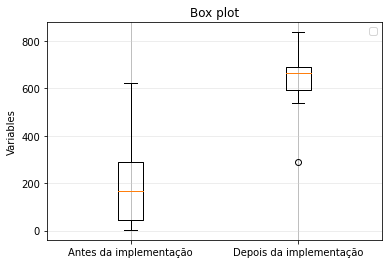

In [10]:
## CÉLULA 9: ANÁLISE DE VARIÂNCIA, CÁLCULO DOS INTERVALOS DE CONFIANÇA E CONSTRUÇÃO DO BOXPLOT PARA SEUS DADOS

#DEFINA O NOME DA COLUNA COM AS VARIÁVEIS Y comparadas. Basta substituir o valor entre aspas pelo nome da coluna onde está Y:
nome_y = "count"

#DEFINA O NOME DA COLUNA COM OS GRUPOS/TRATAMENTOS/FATORES. Basta substituir o valor entre aspas pelo nome da coluna 
#na qual são identificados os fatores:
nome_fator = "time_tag"

confidence_interval = anova_boxplot_same_column(dataframe = dataset, col_y_name = nome_y, col_factor_name = nome_fator, confidence = 0.95, factor_labels = ["Antes da implementação", "Depois da implementação"], reference_line = None,  plot_boxplot = True, calculate_confidence_interval = True)

"""
Substitua os demais campos de acordo com as instruções dadas na CÉLULA 8.
"""

confidence_interval.to_csv(r"confidence_interval_app_weekly.csv", index = False)



In [9]:
confidence_interval

,Valor,0.0,1.0
0,Nível de confiança (em porcentagem) = 95.00,NaN,NaN
1,Limite inferior do intervalo de confiança da m...,1.208475e+02,5.634380e+02
2,Média amostral: centro do intervalo de confiança,2.085000e+02,6.325714e+02
3,Limite superior do intervalo de confiança da m...,2.961525e+02,7.017048e+02
4,p-valor do ANOVA:\nProbabilidade de as médias ...,4.175591e-08,4.175591e-08
5,Probabilidade de as médias serem iguais (em %),4.175591e-06,4.175591e-06


**ANOVA dos Waiting times**

No handles with labels found to put in legend.


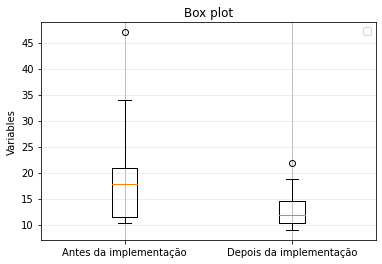

In [11]:
#DEFINA O NOME DA COLUNA COM AS VARIÁVEIS Y comparadas. Basta substituir o valor entre aspas pelo nome da coluna onde está Y:
nome_y = "waiting_time"

#DEFINA O NOME DA COLUNA COM OS GRUPOS/TRATAMENTOS/FATORES. Basta substituir o valor entre aspas pelo nome da coluna 
#na qual são identificados os fatores:
nome_fator = "time_tag"

confidence_interval_waiting_time = anova_boxplot_same_column(dataframe = dataset, col_y_name = nome_y, col_factor_name = nome_fator, confidence = 0.95, factor_labels = ["Antes da implementação", "Depois da implementação"], reference_line = None,  plot_boxplot = True, calculate_confidence_interval = True)

"""
Substitua os demais campos de acordo com as instruções dadas na CÉLULA 8.
"""

confidence_interval_waiting_time.to_csv(r"confidence_interval_waiting_time_app_weekly.csv", index = False)

In [7]:
confidence_interval_waiting_time

,Valor,0.0,1.0
0,Nível de confiança (em porcentagem) = 95.00,NaN,NaN
1,Limite inferior do intervalo de confiança da m...,14.664054,11.003152
2,Média amostral: centro do intervalo de confiança,18.527562,13.204216
3,Limite superior do intervalo de confiança da m...,22.391071,15.405279
4,p-valor do ANOVA:\nProbabilidade de as médias ...,0.043473,0.043473
5,Probabilidade de as médias serem iguais (em %),4.347273,4.347273
